In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Basic Concepts

## What is "learning from data"?

> In general **Learning from Data** is a scientific discipline that is concerned with the design and development of algorithms that allow computers to infer (from data) a  model that allows *compact representation* (unsupervised learning) and/or *good generalization* (supervised learning).

This is an important technology because it enables computational systems to adaptively improve their performance with experience accumulated from the observed data. 

Most of these algorithms are based on the *iterative solution* of a mathematical problem that involves data and model. If there was an analytical solution to the problem, this should be the adopted one, but this is not the case for most of the cases.

So, the most common strategy for **learning from data** is based on solving a system of equations as a way to find a series of parameters of the model that minimizes a mathematical problem. This is called **optimization**.

The most important technique for solving optimization problems is **gradient descend**.

## Preliminary: Nelder-Mead method for function minimization.

The most simple thing we can try to minimize a function $f(x)$ would be to sample two points relatively near each other, and just repeatedly take a step down away from the largest value. This simple algorithm has a severe limitation: it can't get closer to the true minima than the step size.  

The Nelder-Mead method dynamically adjusts the step size based off the loss of the new point. If the new point is better than any previously seen value, it **expands** the step size to accelerate towards the bottom. Likewise if the new point is worse it **contracts** the step size to converge around the minima. The usual settings are to half the step size when contracting and double the step size when expanding. 

This method can be easily extended into higher dimensional examples, all that's required is taking one more point than there are dimensions. Then, the simplest approach is to replace the worst point with a point reflected through the centroid of the remaining n points. If this point is better than the best current point, then we can try stretching exponentially out along this line. On the other hand, if this new point isn't much better than the previous value, then we are stepping across a valley, so we shrink the step towards a better point.

> See "An Interactive Tutorial on Numerical Optimization": http://www.benfrederickson.com/numerical-optimization/

## Gradient descend (for *hackers*): 1-D

Let's suppose that we have a function $f: \Re \rightarrow \Re$. For example: 

$$f(x) = x^2$$

Our objective is to find the argument  $x$ that minimizes this function (for maximization, consider $-f(x)$). To this end, the critical concept is the **derivative**.

The derivative of $f$ of a variable $x$, $f'(x)$ or $\frac{\mathrm{d}f}{\mathrm{d}x}$,  is a measure of the rate at which the value of the function changes with respect to the change of the variable. It is defined as the following limit:


$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} $$

The derivative specifies how to scale a small change in the input in order to obtain the corresponding change in the output: 

$$ f(x + h) \approx f(x) + h f'(x)$$

In [2]:
# numerical derivative at a point x

def f(x):
    return x**2

def fin_dif(x, f, h = 0.00001):
    '''
    This method returns the derivative of f at x
    by using the finite difference method
    '''
    return (f(x+h) - f(x))/h

x = 2.0
print "{:2.4f}".format(fin_dif(x,f))

4.0000


It can be shown that the “centered difference formula" is better when computing numerical derivatives:

$$ \lim_{h \rightarrow 0} \frac{f(x + h) - f(x - h)}{2h} $$

The error in the "finite difference" approximation can be derived from Taylor's theorem and, assuming that $f$ is differentiable, is $O(h)$. In the case of “centered difference" the error is $O(h^2)$.

The derivative tells how to chage $x$ in order to make a small improvement in $f$. 

Then, we can follow these steps to decrease the value of the function:

+ Start from a random $x$ value.
+ Compute the derivative $f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x - h)}{2h}$.
+ Walk a small step (possibly weighted by the derivative module) in the **opposite** direction of the derivative, because we know that $f(x - h \mbox{ sign}(f'(x))$ is less than $f(x)$ for  small enough $h$. 

The search for the minima ends when the derivative is zero because we have no more information about which direction to move. $x$ is a critical o stationary point if $f'(x)=0$. 

 + A **minimum (maximum)** is a critical point where $f(x)$ is lower (higher) than at all neighboring points. 
 + There is a third class of critical points: **saddle points**.

If $f$ is a **convex function**, this should be the minimum (maximum) of our functions. In other cases it could be a local minimum (maximum) or a saddle point.

There are two problems with numerical derivatives:
+ It is approximate.
+ It is very slow to evaluate (two function evaluations: $f(x + h) , f(x - h)$ ).

### Step size

Usually, we multiply the gradient by a step size. This step size (often called **alpha**) has to be chosen carefully, as a value too small will result in a long computation time, while a value too large will not give you the right result (by overshooting) or even fail to converge. 


### Analytical derivative

Let's suppose now that we know the analytical derivative. This is only one function evaluation!

In [3]:
old_min = 0
temp_min = 15
step_size = 0.01
precision = 0.0001

def f(x):
    return x**2 - 6*x + 5
    
def f_derivative(x):
    import math
    return 2*x -6

mins = []
cost = []

while abs(temp_min - old_min) > precision:
    old_min = temp_min 
    gradient = f_derivative(old_min) 
    move = gradient * step_size
    temp_min = old_min - move
    cost.append((3-temp_min)**2)
    mins.append(temp_min)

# rounding the result to 2 digits because of the step size
print "Local minimum occurs at {:3.6f}.".format(round(temp_min,2))

Local minimum occurs at 3.000000.


#### Exercise 
What happens if ``step_size``=1.0?

An important feature of gradient descent is that **there should be a visible improvement over time**. In this example, we simply plotted the
change in the value of the minimum against the iteration during which it was calculated. As we can see, the distance gets smaller over time, but barely changes in later iterations.

<function matplotlib.pyplot.show>

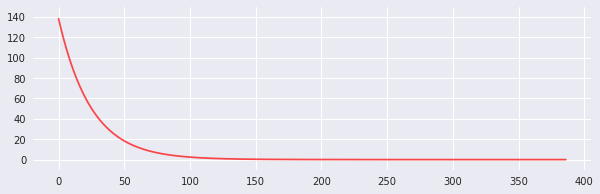

In [4]:
x = np.linspace(-10,20,100)
y = x**2 - 6*x + 5

x, y = (zip(*enumerate(cost)))

fig, ax = plt.subplots(1, 1)
fig.set_facecolor('#EAEAF2')
plt.plot(x,y, 'r-', alpha=0.7)
plt.ylim([-10,150])
plt.gcf().set_size_inches((10,3))
plt.grid(True)
plt.show

<function matplotlib.pyplot.show>

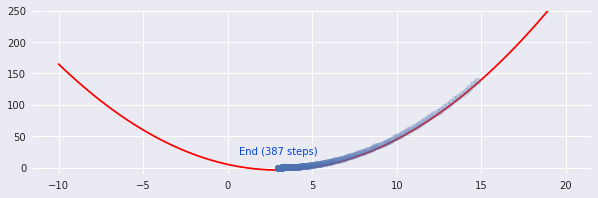

In [5]:
x = np.linspace(-10,20,100)
y = x**2 - 6*x + 5

fig, ax = plt.subplots(1, 1)
fig.set_facecolor('#EAEAF2')
plt.plot(x,y, 'r-')
plt.ylim([-10,250])
plt.gcf().set_size_inches((10,3))
plt.grid(True)
plt.plot(mins,cost,'o', alpha=0.3)
ax.text(mins[-1],
        cost[-1]+20,
        'End (%s steps)' % len(mins),
        ha='center',
        color=sns.xkcd_rgb['blue'],
       )
plt.show

## From derivatives to gradient: $n$-dimensional function minimization.

Let's consider a $n$-dimensional function $f: \Re^n \rightarrow \Re$. For example: 

$$f(\mathbf{x}) = \sum_{n} x_n^2$$

Our objective is to find the argument  $\mathbf{x}$ that minimizes this function.

The **gradient** of $f$ is the vector whose components are the $n$ partial derivatives of $f$. It is thus a vector-valued function. 

The gradient points in the direction of the greatest rate of **increase** of the function.

$$\nabla {f} = (\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n})$$

In [6]:
def f(x):
    return sum(x_i**2 for x_i in x)

def fin_dif_partial_centered(x, f, i, h=1e-6):
    w1 = [x_j + (h if j==i else 0) for j, x_j in enumerate(x)]
    w2 = [x_j - (h if j==i else 0) for j, x_j in enumerate(x)]
    return (f(w1) - f(w2))/(2*h)

def gradient_centered(x, f, h=1e-6):
    return[round(fin_dif_partial_centered(x,f,i,h), 10) 
           for i,_ in enumerate(x)]

x = [1.0,1.0,1.0]

print '{:.6f}'.format(f(x)), gradient_centered(x,f)


3.000000 [2.0000000001, 2.0000000001, 2.0000000001]


The function we have evaluated, $f({\mathbf x}) = x_1^2+x_2^2+x_3^2$, is $3$ at $(1,1,1)$ and the gradient vector at this point is $(2,2,2)$. 

Then, we can follow this steps to maximize (or minimize) the function:

+ Start from a random $\mathbf{x}$ vector.
+ Compute the gradient vector.
+ Walk a small step in the opposite direction of the gradient vector.

> It is important to be aware that this gradient computation is very expensive: if $\mathbf{x}$ has dimension $n$, we have to evaluate $f$ at $2*n$ points.


### How to use the gradient.

$f(x) = \sum_i x_i^2$, takes its mimimum value when all $x$ are 0. 

Let's check it for $n=3$: 

In [7]:
def euc_dist(v1,v2):
    import numpy as np
    import math
    v = np.array(v1)-np.array(v2)
    return math.sqrt(sum(v_i ** 2 for v_i in v))

Let's start by choosing a random vector and then walking a step in the opposite direction of the gradient vector. We will stop when the difference between the new solution and the old solution is less than a tolerance value.

In [8]:
# choosing a random vector

import random
import numpy as np

x = [random.randint(-10,10) for i in range(3)]
x

[4, 5, -1]

In [9]:
def step(x,grad,alpha):
    return [x_i - alpha * grad_i for x_i, grad_i in zip(x,grad)]

tol = 1e-15
alpha = 0.01
while True:
    grad = gradient_centered(x,f)
    next_x = step(x,grad,alpha)
    if euc_dist(next_x,x) < tol:
        break
    x = next_x
print [round(i,10) for i in x]

[0.0, 0.0, -0.0]


### Choosing Alpha

The step size, **alpha**, is a slippy concept: if it is too small we will slowly converge to the solution, if it is too large we can diverge from the solution. 

There are several policies to follow when selecting the step size:

+ Constant size steps. In this case, the size step determines the precision of the solution.
+ Decreasing step sizes.
+ At each step, select the optimal step.

The last policy is good, but too expensive. In this case we would consider a fixed set of values:

In [15]:
step_size = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

## Learning from data

In general, we have:

+ A dataset $(\mathbf{x},y)$ of $n$ examples. 
+ A target function $f_\mathbf{w}$, that we want to minimize, representing the **discrepancy between our data and the model** we want to fit. The model is represented by a set of parameters $\mathbf{w}$. 
+ The gradient of the target function, $g_f$. 


In the most common case $f$ represents the errors from a data representation model $M$. To fit the model is to find the optimal parameters $\mathbf{w}$ that minimize the following expression:

$$ f_\mathbf{w} = \frac{1}{n} \sum_{i} (y_i - M(\mathbf{x}_i,\mathbf{w}))^2 $$

For example, $(\mathbf{x},y)$ can represent:

+ $\mathbf{x}$: the behavior of a "Candy Crush" player; $y$: monthly payments. 
+ $\mathbf{x}$: sensor data about your car engine; $y$: probability of engine error.
+ $\mathbf{x}$: finantial data of a bank customer; $y$: customer rating.

> If $y$ is a real value, it is called a *regression* problem.

> If $y$ is binary/categorical, it is called a *classification* problem. 

Let's suppose that our model is a one-dimensional linear model $M(\mathbf{x},\mathbf{w}) = w \cdot x $. 

### Batch gradient descend

We can implement **gradient descend** in the following way (*batch gradient descend*):

In [10]:
import numpy as np
import random

# f = 2x
x = np.arange(10)
y = np.array([2*i for i in x])

# f_target = 1/n Sum (y - wx)**2
def target_f(x,y,w):
    return np.sum((y - x * w)**2.0) / x.size

# gradient_f = 2/n Sum 2wx**2 - 2xy
def gradient_f(x,y,w):
    return 2 * np.sum(2*w*(x**2) - 2*x*y) / x.size

def step(w,grad,alpha):
    return w - alpha * grad

def BGD_multi_step(target_f, 
                   gradient_f, 
                   x, 
                   y, 
                   toler = 1e-6):
    
    alphas = [100, 10, 1, 0.1, 0.001, 0.00001]
    w = random.random()
    val = target_f(x,y,w)
    i = 0
    while True:
        i += 1
        gradient = gradient_f(x,y,w)
        next_ws = [step(w, gradient, alpha) for alpha in alphas]
        next_vals = [target_f(x,y,w) for w in next_ws]
        min_val = min(next_vals)
        next_w = next_ws[next_vals.index(min_val)]   
        next_val = target_f(x,y,next_w)    
        if (abs(val - next_val) < toler):
            return w
        else:
            w, val = next_w, next_val

In [11]:
print '{:.6f}'.format(BGD_multi_step(target_f, gradient_f, x, y))

1.999629


In [12]:
%%timeit
BGD_multi_step(target_f, gradient_f, x, y)

100 loops, best of 3: 3.87 ms per loop


In [13]:
def BGD(target_f, gradient_f, x, y, toler = 1e-6, alpha=0.01):
    w = random.random()
    val = target_f(x,y,w)
    i = 0
    while True:
        i += 1
        gradient = gradient_f(x,y,w)
        next_w = step(w, gradient, alpha)
        next_val = target_f(x,y,next_w)    
        if (abs(val - next_val) < toler):
            return w
        else:
            w, val = next_w, next_val

In [14]:
print '{:.6f}'.format(BGD(target_f, gradient_f, x, y))

2.000082


In [15]:
%%timeit
BGD(target_f, gradient_f, x, y)

The slowest run took 10.57 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 104 µs per loop


### Stochastic Gradient Descend

The last function evals the whole dataset $(\mathbf{x}_i,y_i)$ at every step. 

If the dataset is large, this strategy is too costly. In this case we will use a strategy called **SGD** (*Stochastic Gradient Descend*).

When learning from data, the cost function is additive: it is computed by adding sample reconstruction errors. 

Then, we can compute the estimate the gradient (and move towards the minimum) by using only **one data sample** (or a small data sample).

Thus, we will find the minimum by iterating this gradient estimation over the dataset.

A full iteration over the dataset is called **epoch**. During an epoch, data must be used in a random order.

If we apply this method we have some theoretical guarantees to find a good minimum:
+ SGD essentially uses the inaccurate gradient per iteration. Since there is no free food, what is the cost by using approximate gradient? The answer is that the convergence rate is slower than the gradient descent algorithm.
+ The convergence of SGD has been analyzed using the theories of convex minimization and of stochastic approximation: it converges almost surely to a global minimum when the objective function is convex or pseudoconvex, and otherwise converges almost surely to a local minimum.

In [16]:
def in_random_order(data):
    import random
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

In [17]:
import numpy as np
import random

def SGD(target_f, 
        gradient_f, 
        x, 
        y, 
        toler = 1e-6, 
        epochs=100, 
        alpha_0=0.01):
    
    data = zip(x,y)
    w = random.random()
    alpha = alpha_0
    min_w, min_val = float('inf'), float('inf')
    epoch = 0
    iteration_no_increase = 0
    while epoch < epochs and iteration_no_increase < 100:
        val = target_f(x, y, w)
        if min_val - val > toler:
            min_w, min_val = w, val
            alpha = alpha_0
            iteration_no_increase = 0
        else:
            iteration_no_increase += 1
            alpha *= 0.9
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_f(x_i, y_i, w)
            w = w - (alpha *  gradient_i)
        epoch += 1
    return min_w

In [18]:
print 'w: {:.6f}'.format(SGD(target_f, gradient_f, x, y))

w: 2.000000


## Example: Stochastic Gradient Descent and Linear Regression

The linear regression model assumes a linear relationship between data:

$$ y_i = w_1 x_i + w_0 $$

Let's generate a more realistic dataset (with noise), where $w_1 = 2$ and $w_0 = 0$.

> *The bias trick*. It is a little cumbersome to keep track separetey of $w_i$, the feature weights, and $w_0$, the bias. A common used trick is to combine these parameters into a single structure that holds both of them by extending the vector $x$ with one additional dimension that always holds the constant $1$. With this dimension the model simplifies to a single multiply $f(\mathbf{x},\mathbf{w}) = \mathbf{w} \cdot \mathbf{x}$.

In [19]:
%reset
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_regression 
from scipy import stats 
import random

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<function matplotlib.pyplot.show>

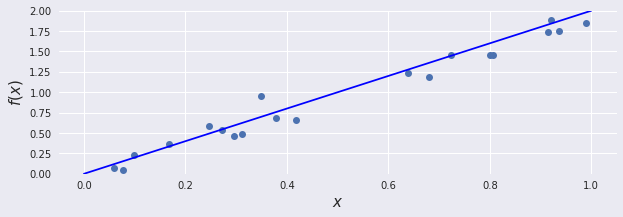

In [20]:
# x: input data
# y: noisy output data

x = np.random.uniform(0,1,20)

# f = 2x + 0
def f(x): return 2*x + 0

noise_variance =0.1
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

fig, ax = plt.subplots(1, 1)
fig.set_facecolor('#EAEAF2')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$f(x)$', fontsize=15)
plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.ylim([0,2])
plt.gcf().set_size_inches((10,3))
plt.grid(True)
plt.show

In [21]:
# f_target = 1/n Sum (y - wx)**2
def target_f(x,y,w):
    return np.sum((y - x * w)**2.0) / x.size

# gradient_f = 2/n Sum 2wx**2 - 2xy
def gradient_f(x,y,w):
    return 2 * np.sum(2*w*(x**2) - 2*x*y) / x.size

def in_random_order(data):
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

def SGD(target_f, 
        gradient_f, 
        x, 
        y, 
        toler = 1e-6, 
        epochs=100, 
        alpha_0=0.01):
    
    data = zip(x,y)
    w = random.random()
    alpha = alpha_0
    min_w, min_val = float('inf'), float('inf')
    iteration_no_increase = 0
    w_cost = []
    epoch = 0
    while epoch < epochs and iteration_no_increase < 100:
        val = target_f(x, y, w)
        if min_val - val > toler:
            min_w, min_val = w, val
            alpha = alpha_0
            iteration_no_increase = 0
        else:
            iteration_no_increase += 1
            alpha *= 0.9
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_f(x_i, y_i, w)
            w = w - (alpha *  gradient_i)
            w_cost.append(target_f(x,y,w))
        epoch += 1
    return min_w, np.array(w_cost)

In [22]:
w, target_value = SGD(target_f, gradient_f, x, y)
print 'w: {:.6f}'.format(w)

w: 1.892644


<function matplotlib.pyplot.show>

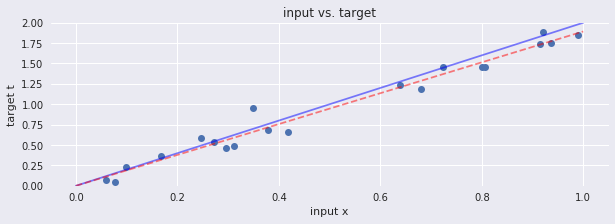

In [23]:
fig, ax = plt.subplots(1, 1)
fig.set_facecolor('#EAEAF2')
plt.plot(x, y, 'o', label='t')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)', alpha=0.5)
plt.plot([0, 1], [0*w, 1*w], 'r-', label='fitted line', alpha=0.5, linestyle='--')
plt.xlabel('input x')
plt.ylabel('target t')
plt.title('input vs. target')
plt.ylim([0,2])
plt.gcf().set_size_inches((10,3))
plt.grid(True)
plt.show

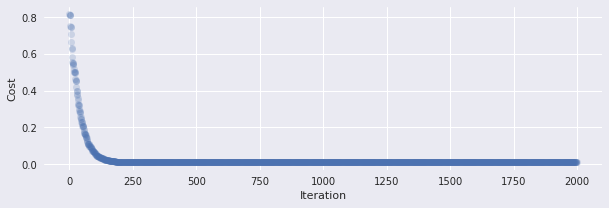

In [24]:
fig, ax = plt.subplots(1, 1)
fig.set_facecolor('#EAEAF2')
plt.plot(np.arange(target_value.size), target_value, 'o', alpha = 0.2)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.gcf().set_size_inches((10,3))
plt.grid(True)
plt.show()

## Mini-batch Gradient Descent

In code, general batch gradient descent looks something like this:

```python
nb_epochs = 100
for i in range(nb_epochs):
    grad = evaluate_gradient(target_f, data, w)
    w = w - learning_rate * grad
```

For a pre-defined number of epochs, we first compute the gradient vector of the target function for the whole dataset w.r.t. our parameter vector. 

**Stochastic gradient descent** (SGD) in contrast performs a parameter update for each training example and label:

```python
nb_epochs = 100
for i in range(nb_epochs):
    np.random.shuffle(data)
    for sample in data:
        grad = evaluate_gradient(target_f, sample, w)
        w = w - learning_rate * grad
```

**Mini-batch gradient descent** finally takes the best of both worlds and performs an update for every mini-batch of $n$ training examples:

```python
nb_epochs = 100
for i in range(nb_epochs):
  np.random.shuffle(data)
  for batch in get_batches(data, batch_size=50):
    grad = evaluate_gradient(target_f, batch, w)
    w = w - learning_rate * grad
```

Minibatch SGD has the advantage that it works with a slightly less noisy estimate of the gradient. However, as the minibatch size increases, the number of updates done per computation done decreases (eventually it becomes very inefficient, like batch gradient descent). 

There is an optimal trade-off (in terms of computational efficiency) that may vary depending on the data distribution and the particulars of the class of function considered, as well as how computations are implemented.

In [25]:
def get_batches(iterable, n = 1):
    current_batch = []
    for item in iterable:
        current_batch.append(item)
        if len(current_batch) == n:
            yield current_batch
            current_batch = []
    if current_batch:
        yield current_batch

In [26]:
%reset
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_regression 
from scipy import stats 
import random

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


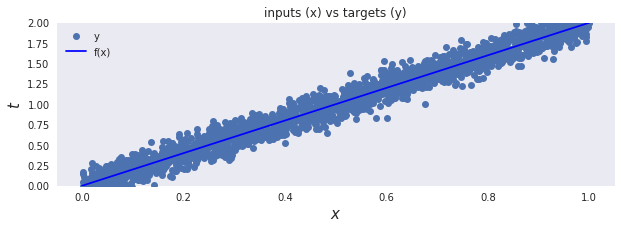

In [27]:
# x: input data
# y: noisy output data

x = np.random.uniform(0,1,2000)

# f = 2x + 0
def f(x): return 2*x + 0

noise_variance =0.1
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((10,3))
plt.show()

In [28]:
# f_target = 1/n Sum (y - wx)**2
def target_f(x,y,w):
    return np.sum((y - x * w)**2.0) / x.size

# gradient_f = 2/n Sum 2wx**2 - 2xy
def gradient_f(x,y,w):
    return 2 * np.sum(2*w*(x**2) - 2*x*y) / x.size

def in_random_order(data):
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]
        
def get_batches(iterable, n = 1):
    current_batch = []
    for item in iterable:
        current_batch.append(item)
        if len(current_batch) == n:
            yield current_batch
            current_batch = []
    if current_batch:
        yield current_batch

def SGD_MB(target_f, gradient_f, x, y, epochs=100, alpha_0=0.01):
    data = zip(x,y)
    w = random.random()
    alpha = alpha_0
    min_w, min_val = float('inf'), float('inf')
    epoch = 0
    while epoch < epochs:
        val = target_f(x, y, w)
        if val < min_val:
            min_w, min_val = w, val
            alpha = alpha_0
        else:
            alpha *= 0.9
        np.random.shuffle(data)
        for batch in get_batches(data, n = 100):
            x_batch = np.array(zip(*batch)[0])
            y_batch = np.array(zip(*batch)[1])
            gradient = gradient_f(x_batch, y_batch, w)
            w = w - (alpha *  gradient)
        epoch += 1
    return min_w

In [29]:
w = SGD_MB(target_f, gradient_f, x, y)
print 'w: {:.6f}'.format(w)

w: 2.001409


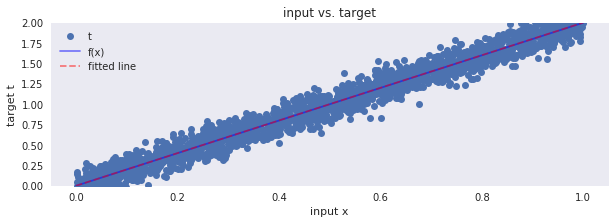

In [30]:
plt.plot(x, y, 'o', label='t')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)', alpha=0.5)
plt.plot([0, 1], [0*w, 1*w], 'r-', label='fitted line', alpha=0.5, linestyle='--')
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0,2])
plt.title('input vs. target')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((10,3))
plt.show()

## Loss Funtions

Loss functions $L(y, f(\mathbf{x})) = \frac{1}{n} \sum_i \ell(y_i, f(\mathbf{x_i}))$ represent the price paid for inaccuracy of predictions in classification/regression problems.

In classification this function is often the **zero-one loss**, that is, $ \ell(y_i, f(\mathbf{x_i}))$ is zero when $y_i = f(\mathbf{x}_i)$ and one otherwise.

This function is discontinuous with flat regions and is thus extremely hard to optimize using gradient-based methods. For this reason it is usual to consider a proxy to the loss called a *surrogate loss function*. For computational reasons this is usually convex function. Here we have some examples:

### Square / Euclidean Loss

In regression problems, the most common loss function is the square loss function:

$$ L(y, f(\mathbf{x})) = \frac{1}{n} \sum_i (y_i - f(\mathbf{x}_i))^2  $$

The square loss function can be re-written and utilized for classification:

$$ L(y, f(\mathbf{x})) = \frac{1}{n} \sum_i (1 - y_i f(\mathbf{x}_i))^2  $$


### Hinge / Margin Loss (i.e. Suport Vector Machines)

The hinge loss function is defined as:

$$ L(y, f(\mathbf{x})) = \frac{1}{n} \sum_i \mbox{max}(0, 1 - y_i f(\mathbf{x}_i))  $$

The hinge loss provides a relatively tight, convex upper bound on the 0–1 Loss.


<img src="images/loss_functions.png">


### Logistic Loss (Logistic Regression)

This function displays a similar convergence rate to the hinge loss function, and since it is continuous, simple gradient descent methods can be utilized. 

$$ L(y, f(\mathbf{x})) = \frac{1}{n} log(1 + exp(-y_i f(\mathbf{x}_i))) $$


### Sigmoid Cross-Entropy Loss (Softmax classifier)

Cross-Entropy is a loss function that is very used for training **multiclass problems**. We'll focus on models that assume that classes are mutually exclusive. 

In this case, our labels have this form $\mathbf{y}_i =(1.0,0.0,0.0)$. If our model predicts a different distribution, say  $ f(\mathbf{x}_i)=(0.4,0.1,0.5)$, then we'd like to nudge the parameters so that $f(\mathbf{x}_i)$ gets closer to $\mathbf{y}_i$.

C.Shannon showed that if you want to send a series of messages composed of symbols from an alphabet with distribution $y$ ($y_j$  is the probability of the  $j$-th symbol), then to use the smallest number of bits on average, you should assign  $\log(\frac{1}{y_j})$  bits to the  $j$-th symbol. 

The optimal number of bits is known as **entropy**:

$$ H(\mathbf{y}) = \sum_j y_j \log\frac{1}{y_j} = - \sum_j y_j \log y_j$$

**Cross entropy** is the number of bits we'll need if we encode symbols by using a wrong distribution $\hat y$:

$$ H(y, \hat y) =   - \sum_j y_j \log \hat y_j $$ 

In our case, the real distribution is $\mathbf{y}$ and the "wrong" one is $f(\mathbf{x}_i)$. So, minimizing **cross entropy** with respect our model parameters will result in the model that best approximates our labels if considered as a probabilistic distribution. 

Cross entropy is used in combination with **Softmax** classifier. In order to classify $\mathbf{x}_i$ we could take the index corresponding to the max value of $f(\mathbf{x}_i)$, but Softmax gives a slightly more intuitive output (normalized class probabilities) and also has a probabilistic interpretation:

$$ P(\mathbf{y}_i = j \mid \mathbf{x_i}) = - log \left( \frac{e^{f_j(\mathbf{x_i})}}{\sum_k e^{f_k(\mathbf{x_i})} } \right) $$

where $f_k$ is a linear classifier. 


## Advanced gradient descend


### Momentum

SGD has trouble navigating ravines, i.e. areas where the surface curves much more steeply in one dimension than in another, which are common around local optima. In these scenarios, SGD oscillates across the slopes of the ravine while only making hesitant progress along the bottom towards the local optimum.

<img src="images/ridge2.png">

Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction of the update vector of the past time step to the current update vector:

$$ v_t = m v_{t-1} + \alpha \nabla_w f $$
$$ w = w - v_t    $$

The momentum $m$ is commonly set to $0.9$.

### Nesterov

However, a ball that rolls down a hill, blindly following the slope, is highly unsatisfactory. We'd like to have a smarter ball, a ball that has a notion of where it is going so that it knows to slow down before the hill slopes up again.

Nesterov accelerated gradient (NAG) is a way to give our momentum term this kind of prescience. We know that we will use our momentum term $m v_{t-1}$ to move the parameters $w$. Computing 
$w - m v_{t-1}$ thus gives us an approximation of the next position of the parameters (the gradient is missing for the full update), a rough idea where our parameters are going to be. We can now effectively look ahead by calculating the gradient not w.r.t. to our current parameters $w$ but w.r.t. the approximate future position of our parameters:

$$ w_{new} = w - m v_{t-1} $$
$$ v_t = m v_{t-1} + \alpha \nabla_{w_{new}} f $$
$$ w = w - v_t $$

### Adagrad

All previous approaches manipulated the learning rate globally and equally for all parameters. Tuning the learning rates is an expensive process, so much work has gone into devising methods that can adaptively tune the learning rates, and even do so per parameter. 

Adagrad is an algorithm for gradient-based optimization that does just this: It adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters.

$$ c = c + (\nabla_w f)^2 $$
$$ w = w - \frac{\alpha}{\sqrt{c}} $$ 


### RMProp

RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate. In particular, it uses a moving average of squared gradients instead, giving:

$$ c = \beta c + (1 - \beta)(\nabla_w f)^2 $$
$$ w = w - \frac{\alpha}{\sqrt{c}} $$ 

where $\beta$ is a decay rate that controls the size of the moving average.


<img src="images/g1.gif">

(Image credit: Alec Radford) 

<img src="images/g2.gif">

(Image credit: Alec Radford) 
